In [1]:
import pandas as pd
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as dt

In [2]:
precos = pd.DataFrame()

stocks = ["ABEV3.SA" , "ASAI3.SA" , "AZUL4.SA" , "B3SA3.SA" , "BBAS3.SA" , "BBDC3.SA",  "BBDC4.SA" , "BBSE3.SA" , "BEEF3.SA", 
"BPAC11.SA", "BRAP4.SA" , "BRDT3.SA" , "BRFS3.SA" , "BRKM5.SA" , "BRML3.SA" , "AMER3.SA" , "CCRO3.SA" , "CIEL3.SA" ,
"CMIG4.SA"  ,"COGN3.SA" , "CPFE3.SA" , "CPLE6.SA" , "CRFB3.SA" , "CSAN3.SA" , "CSNA3.SA" , "CVCB3.SA" , "CYRE3.SA" ,
"ECOR3.SA"  ,"EGIE3.SA" , "ELET3.SA" , "ELET6.SA" , "EMBR3.SA" , "ENBR3.SA" , "ENEV3.SA" , "ENGI11.SA", "EQTL3.SA" ,
"EZTC3.SA"  ,"FLRY3.SA" , "GGBR4.SA" , "GNDI3.SA" , "GOAU4.SA" , "GOLL4.SA" , "HAPV3.SA" , "HGTX3.SA" , "HYPE3.SA" ,
"IGTA3.SA"  ,"IRBR3.SA" , "ITSA4.SA" , "ITUB4.SA" , "JBSS3.SA" , "JHSF3.SA" , "KLBN11.SA", "LAME4.SA" , "LCAM3.SA" ,
"LREN3.SA"  ,"MGLU3.SA" , "MRFG3.SA" , "MRVE3.SA" , "MULT3.SA" , "NTCO3.SA" , "PCAR3.SA" , "PETR3.SA" , "PETR4.SA" ,
"PRIO3.SA"  ,"QUAL3.SA" , "RADL3.SA" , "RAIL3.SA" , "RENT3.SA" , "SANB11.SA", "SBSP3.SA" , "SULA11.SA", "SUZB3.SA" ,
"TAEE11.SA" ,"TIMS3.SA" , "TOTS3.SA" , "UGPA3.SA" , "USIM5.SA" , "VALE3.SA" , "VIVT3.SA" , "VIIA3.SA" , "WEGE3.SA" ,
"YDUQ3.SA"]

for i in stocks:
    precos[i] = dt.DataReader(i, data_source = 'yahoo', start = '2018-01-01')['Close']
    
precos.dropna(inplace=True)

rets = precos.pct_change()

In [5]:
rf = (1 + 0.0575)**(1/252)-1

In [6]:
corr_mat = rets.corr()
corr_mat

,ABEV3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
ABEV3.SA,1.000000,0.289132,0.382853,0.343647,0.579553,0.545898,0.547871,0.521796,0.205593,0.351877,...,0.348650,0.426106,0.326095,0.322938,0.197082,0.133586,0.517755,0.447284,0.245356,0.364047
ASAI3.SA,0.289132,1.000000,0.276276,0.417854,0.262064,0.292953,0.264920,0.382025,0.189290,0.428077,...,0.211049,0.288522,0.325372,0.391539,0.188017,0.128945,0.184237,0.385396,0.286026,0.297138
AZUL4.SA,0.382853,0.276276,1.000000,0.317268,0.486586,0.488373,0.468227,0.431064,0.085348,0.419366,...,0.182556,0.318566,0.285182,0.361405,0.189174,0.221768,0.260558,0.482314,0.300134,0.463726
B3SA3.SA,0.343647,0.417854,0.317268,1.000000,0.452011,0.479924,0.425278,0.498169,0.201036,0.512470,...,0.218990,0.427794,0.353398,0.473313,0.222494,0.152980,0.266554,0.384529,0.375845,0.327447
BBAS3.SA,0.579553,0.262064,0.486586,0.452011,1.000000,0.764851,0.767111,0.531254,0.212400,0.430689,...,0.332647,0.463679,0.218297,0.510764,0.166937,0.159318,0.410513,0.455515,0.208161,0.430983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALE3.SA,0.133586,0.128945,0.221768,0.152980,0.159318,0.252903,0.236072,0.194322,0.015030,0.186127,...,0.065962,-0.006130,0.068721,0.135742,0.538405,1.000000,0.059831,0.116596,0.109810,0.150445
VIVT3.SA,0.517755,0.184237,0.260558,0.266554,0.410513,0.429359,0.407317,0.493784,0.209472,0.233120,...,0.324051,0.636593,0.238298,0.332707,0.126578,0.059831,1.000000,0.268066,0.303458,0.332956
VIIA3.SA,0.447284,0.385396,0.482314,0.384529,0.455515,0.472479,0.438837,0.577459,0.270947,0.522894,...,0.250866,0.379378,0.374866,0.513705,0.206945,0.116596,0.268066,1.000000,0.347325,0.484375
WEGE3.SA,0.245356,0.286026,0.300134,0.375845,0.208161,0.230627,0.202852,0.328901,0.200069,0.388054,...,0.212199,0.357933,0.445691,0.270366,0.140960,0.109810,0.303458,0.347325,1.000000,0.343492


In [7]:
mean_rets = rets.mean()
mean_rets

ABEV3.SA    0.001129
ASAI3.SA    0.002259
AZUL4.SA   -0.000659
B3SA3.SA   -0.001602
BBAS3.SA    0.000432
              ...   
VALE3.SA   -0.000795
VIVT3.SA   -0.000238
VIIA3.SA   -0.002227
WEGE3.SA    0.000207
YDUQ3.SA   -0.000853
Length: 82, dtype: float64

In [8]:
rets_vector = np.linspace(min(mean_rets), max(mean_rets),2000)
rets_vector

array([-0.00812004, -0.00811218, -0.00810432, ...,  0.00758045,
        0.00758832,  0.00759618])

In [9]:
def volatility(pesos):
    pesos = np.array(pesos)
    covar = np.array(rets.cov())
    vol = np.dot(pesos.T, np.dot(covar,pesos))
    return np.sqrt(vol)

In [10]:
def returns(pesos):
    return np.dot(np.array(pesos), np.array(mean_rets)).sum()

In [11]:
def checksum(pesos):
    return np.sum(pesos)-1

In [12]:
chute = [0.00025 for i in range(82)]

In [13]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1), (0,1),(0,1))

In [14]:
fronteira = []
fronteira_pesos = []
for retorno_possivel in rets_vector:
    cons = ({"type":"eq","fun":checksum},
           {"type":"eq","fun":lambda n:returns(n)-retorno_possivel})
    resultado = opt.minimize(volatility,chute,method = "SLSQP",bounds = bounds, constraints=cons)
    fronteira.append(resultado["fun"])
    fronteira_pesos.append(resultado["x"])

KeyboardInterrupt: 

In [ ]:
min_var = min(fronteira)
retorno_min_var = rets_vector[fronteira.index(min(fronteira))]

In [ ]:
ret = []
vol=[]
for i in range(2000000):
    weights = np.random.rand(82)
    weights /= weights.sum()
    vol.append(volatility(weights))
    ret.append(returns(weights))

In [29]:
sharpe_fronteira = (rets_vector-rf)/fronteira

In [30]:
sharpe_max_vol = fronteira[np.argmax(sharpe_fronteira)]
sharpe_max_retorno = rets_vector[np.argmax(sharpe_fronteira)]

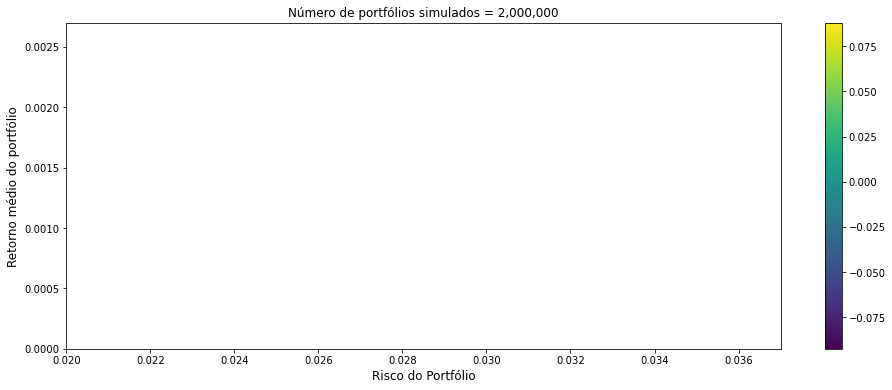

In [31]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,6))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.title("Número de portfólios simulados = 2,000,000")
plt.axis([0.02,0.037,0,0.0027])
colorbar=plt.colorbar()
colorbar.ax.set_label("Sharpe")
plt.show()

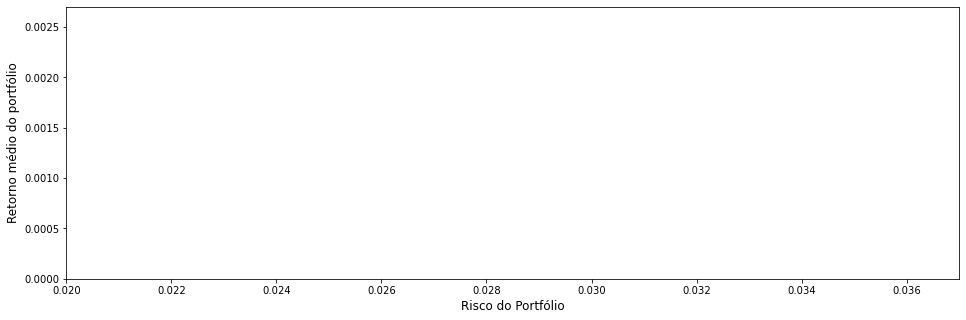

In [32]:
plt.figure(figsize=(16,5))
plt.plot(fronteira,rets_vector)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.show()

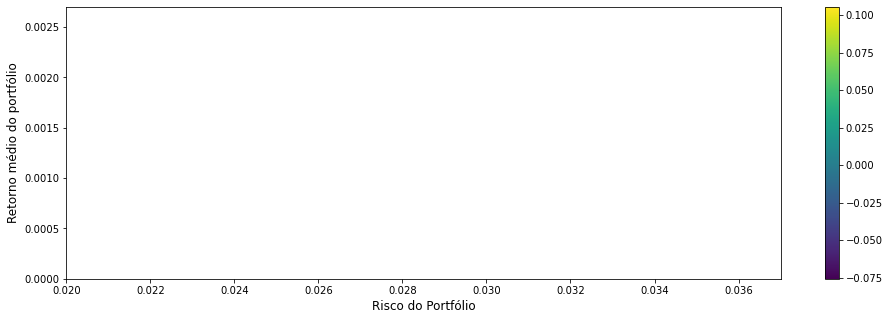

In [33]:
sharpe = (np.array(ret))/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.plot(fronteira,rets_vector,label="Fronteira por otimização")
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.colorbar()
plt.show()

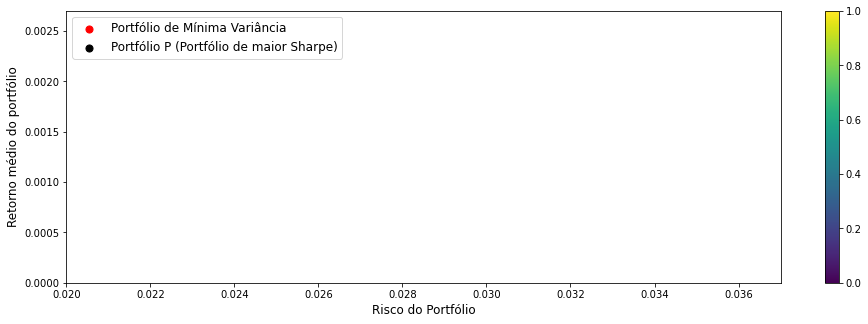

In [34]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.scatter(min_var,retorno_min_var,label="Portfólio de Mínima Variância",c="red",s=50,zorder=2)
plt.scatter(sharpe_max_vol,sharpe_max_retorno,label="Portfólio P (Portfólio de maior Sharpe)",c="black",s=50,zorder=2)
plt.plot(fronteira,rets_vector,zorder=1)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.legend(loc="upper left",fontsize=12)
plt.colorbar()
plt.show()

In [56]:
inclinacao_lac = (sharpe_max_retorno-rf)/sharpe_max_vol

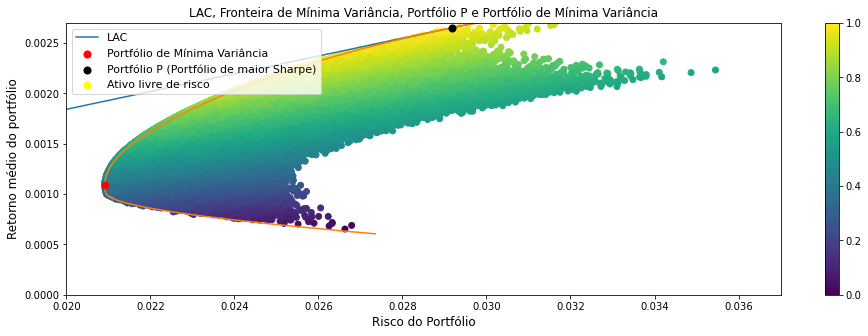

In [58]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.scatter(min_var,retorno_min_var,label="Portfólio de Mínima Variância",c="red",s=50,zorder=2)
plt.scatter(sharpe_max_vol,sharpe_max_retorno,label="Portfólio P (Portfólio de maior Sharpe)",c="black",s=50,zorder=2)
plt.scatter(0,rf,label="Ativo livre de risco",c="yellow",s=50,zorder=2)
plt.plot(np.array([0,0.01,0.02,0.03]),np.array([0,0.01,0.02,0.03])*inclinacao_lac+rf,label="LAC",zorder=1)
plt.plot(fronteira,rets_vector,zorder=1)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.legend(loc="upper left",fontsize=11)
plt.title("LAC, Fronteira de Mínima Variância, Portfólio P e Portfólio de Mínima Variância")
plt.colorbar()
plt.show()